# Importing Libraries

In [1]:
import re
import nltk
import numpy as np
import string as s
import pandas as pd
import pickle as pkl
import seaborn as sns
from nltk.corpus import stopwords
from nltk.probability import FreqDist

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

# Importing Evaluation matrces
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report, plot_confusion_matrix

# Loading the Dataset

In [2]:
# Reading datasets
df0= pd.read_excel('My_dataset.xlsx', sheet_name=0).iloc[:, :2]
df1= pd.read_excel('My_dataset.xlsx', sheet_name=1).iloc[:, :2]

In [3]:
# Setting column names
df0.columns = ["headline", "clickbait"]
df1.columns = ["headline", "clickbait"]

In [4]:
print(f"Shape of DF0 {df0.shape}")
print(f"Shape of DF1 {df1.shape}")

Shape of DF0 (251, 2)
Shape of DF1 (251, 2)


In [5]:
# COmbining
df = pd.concat([df0, df1])
df.head()

,headline,clickbait
0,TikTok Star Charles Gross Doesn’t Want To Be M...,1
1,Actor Ellen Barkin Testified That Johnny Depp ...,1
2,The Bored Ape Dating App That Shut Down Becaus...,1
3,A Black Doctor Tried To Diversify Medicine. Th...,1
4,Let's Hear From You! Take Our Teen Sex Educati...,1


In [6]:
df.shape

(502, 2)

# Splitting into Train and Test sets

The dataset is splitted into training and testing sets. The percentage of training data is 75% and testing data is 25%.

In [7]:
x = df.headline
y = df.clickbait
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=2)

# Analyzing Train and Test Data

In [8]:
print("No. of elements in training set")
print(X_train.size)
print("No. of elements in testing set")
print(X_test.size)

No. of elements in training set
376
No. of elements in testing set
126


In [9]:
X_train.head(10)

225    Couple film 'very British' video for stranger ...
8      Monkeypox: How UK hospitals are tackling the o...
114                      SAVES PET GOOSE FROM BALD EAGLE
239    Scientists develop tool to identify patients m...
68     Chris Jericho Says Niece Brutally Beaten In Bu...
233    Extreme weather pushes number of people forced...
191         EasyJet cancels 200 flights due to IT issues
88     Russian gymnast Ivan Kuliak banned for wearing...
71     Roads closed as six crews tackle fire in Cardi...
159    Microplastics in sewage: a toxic combination t...
Name: headline, dtype: object

In [10]:
y_train.head(10)

225    1
8      0
114    1
239    0
68     1
233    0
191    0
88     0
71     0
159    0
Name: clickbait, dtype: int64

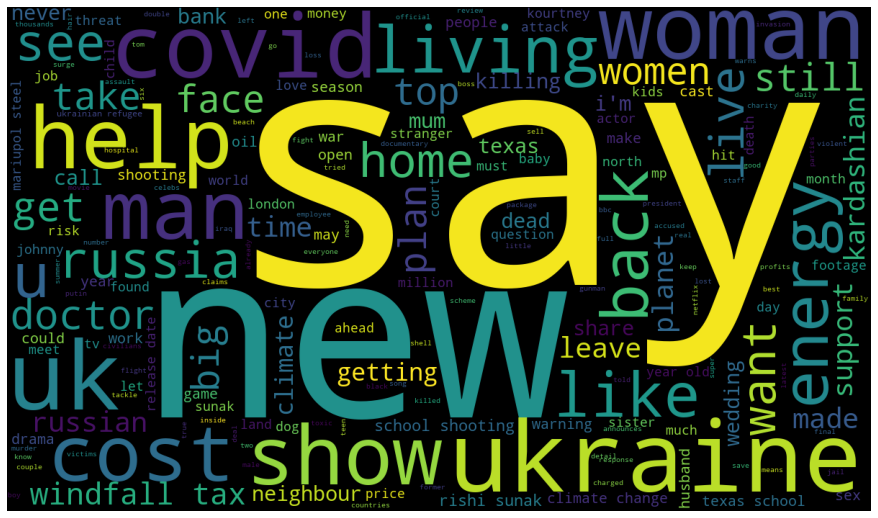

In [11]:
def plot_wordcloud(text):
    from wordcloud import WordCloud
    # Generating WordCloud
    comment_words = ''
    stopwords = nltk.corpus.stopwords.words("english")

    # iterate through the csv file
    for val in text:
        # typecaste each val to string
        val = str(val)
        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 1200, height = 700, background_color ='black',
          stopwords = stopwords,
          min_font_size = 10).generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize = (12, 7), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

plot_wordcloud(X_train)

Total unique values are:  2 


Category	Value

1    193
0    183
Name: clickbait, dtype: int64


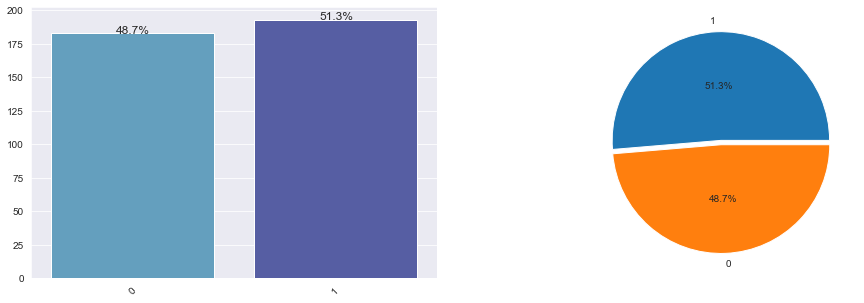

In [12]:
def make_plots(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="white", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    
    plt.subplot(1,2,2)
    labels = data.index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*categories_num, labels=labels, pctdistance=0.5)
    plt.title(title, fontsize=16)
    plt.show()

make_plots(y_train)

# Data Preprocessing

## Tokenization of Data

The data is tokenized i.e. split into tokens which are the smallest or minimal meaningful units. The data is split into words.

In [13]:
def tokenization(text):
    lst=text.split()
    return lst
X_train=X_train.apply(tokenization)
X_test=X_test.apply(tokenization)

## Converting to lowercase

The data is converted into lowercase to avoid ambiguity between same words in different cases like 'NLP', 'nlp' or 'Nlp'. 

In [14]:
def lowercasing(lst):
    new_lst=[]
    for i in lst:
        i=i.lower()
        new_lst.append(i)
    return new_lst
X_train=X_train.apply(lowercasing)
X_test=X_test.apply(lowercasing)  

## Removing punctuation

The punctuations are removed to increase the efficiency of the model. They are irrelevant because they provide no added information.

In [15]:
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for j in s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
X_train=X_train.apply(remove_punctuations)
X_test=X_test.apply(remove_punctuations)  

## Removing Numbers

In [16]:
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]
    for i in lst:
        for j in s.digits:    
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in nodig_lst:
        if i!='':
            new_lst.append(i)
    return new_lst
X_train=X_train.apply(remove_numbers)
X_test=X_test.apply(remove_numbers)

## Removing Stopwords

In [17]:
print("All stopwords of English language ")
", ".join(stopwords.words('english'))

All stopwords of English language 


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [18]:
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

X_train=X_train.apply(remove_stopwords)
X_test=X_test.apply(remove_stopwords)  

## Removing extra spaces

In [19]:
def remove_spaces(lst):
    new_lst=[]
    for i in lst:
        i=i.strip()
        new_lst.append(i)
    return new_lst
X_train=X_train.apply(remove_spaces)
X_test=X_test.apply(remove_spaces)

## Analyzing data after preprocessing

After preprocessing the data i.e. after removing punctuation, stopwords, spaces and numbers.

In [20]:
X_train.head()

225    [couple, film, british, video, stranger, findi...
8         [monkeypox, uk, hospitals, tackling, outbreak]
114                     [saves, pet, goose, bald, eagle]
239    [scientists, develop, tool, identify, patients...
68     [chris, jericho, says, niece, brutally, beaten...
Name: headline, dtype: object

In [21]:
X_test.head()

178    [succession, creator, reveals, writing, season...
206    [eyewatering, fraud, levels, covid, loans, mis...
223      [sold, eggs, pay, student, debt, didnt, option]
5             [energy, prices, £bn, windfall, tax, work]
213    [british, toddler, drowns, swimming, pool, spa...
Name: headline, dtype: object

# Lemmatization

Lemmatization in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form. It involves the morphological analysis of words.

In lemmatization we find the root word or base form of the word rather than just clipping some characters from the end e.g. *is, are, am* are all converted to its base form *be* in Lemmatization

Here lemmatization is done using NLTK library.

In [22]:
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
X_train=X_train.apply(lemmatzation)
X_test=X_test.apply(lemmatzation)

In [23]:
X_train=X_train.apply(lambda x: ''.join(i+' ' for i in x))
X_test=X_test.apply(lambda x: ''.join(i+' ' for i in x))

In [24]:
freq_dist={}
for i in X_train.head(20):
    x=i.split()
    for j in x:
        if j not in freq_dist.keys():
            freq_dist[j]=1
        else:
            freq_dist[j]+=1
freq_dist

{'couple': 1,
 'film': 1,
 'british': 1,
 'video': 1,
 'stranger': 1,
 'finding': 1,
 'phone': 1,
 'range': 1,
 'monkeypox': 1,
 'uk': 1,
 'hospital': 1,
 'tackling': 1,
 'outbreak': 1,
 'save': 1,
 'pet': 1,
 'goose': 1,
 'bald': 1,
 'eagle': 1,
 'scientist': 1,
 'develop': 1,
 'tool': 1,
 'identify': 1,
 'patient': 1,
 'risk': 1,
 'covid': 2,
 'death': 1,
 'chris': 1,
 'jericho': 1,
 'say': 1,
 'niece': 1,
 'brutally': 1,
 'beaten': 1,
 'bullying': 1,
 'incident': 1,
 'pleads': 1,
 'help': 2,
 'extreme': 1,
 'weather': 1,
 'push': 1,
 'number': 1,
 'people': 1,
 'forced': 1,
 'leave': 1,
 'home': 2,
 'record': 1,
 'high': 1,
 'easyjet': 1,
 'cancel': 1,
 'flight': 1,
 'due': 1,
 'issue': 1,
 'russian': 1,
 'gymnast': 1,
 'ivan': 1,
 'kuliak': 1,
 'banned': 1,
 'wearing': 1,
 'z': 1,
 'support': 1,
 'invasion': 1,
 'road': 1,
 'closed': 1,
 'six': 1,
 'crew': 1,
 'tackle': 1,
 'fire': 1,
 'cardington': 1,
 'bedfordshire': 1,
 'microplastics': 1,
 'sewage': 1,
 'toxic': 2,
 'combinatio

In [25]:
X_train.to_csv("X_train.csv")

# TF-IDF (Term frequency-Inverse Data Frequency)

This method is used to convert the text into features.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
tfidf.fit(X_train)

# saving vectorizer
filename = 'vectorizer.sav'
pkl.dump(tfidf, open(filename, 'wb'))

train_1=tfidf.transform(X_train)
test_1=tfidf.transform(X_test)

In [27]:
print("Number of features extracted")
print(len(tfidf.get_feature_names()))


Number of features extracted
1797


In [28]:
print("Shape of train set",train_1.shape)
print("Shape of test set",test_1.shape)

Shape of train set (376, 1797)
Shape of test set (126, 1797)


In [29]:
X_train = train_1.toarray()
X_test = test_1.toarray()

# Building Models

+ ==================================================================================================== +
			1-For LogisitcRegression The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.8492063492063492
--------------------------------------------------
F1 :  [0.84552846 0.85271318]
--------------------------------------------------
Reacll :  [0.76470588 0.94827586]
--------------------------------------------------
Precision :  [0.94545455 0.77464789]
--------------------------------------------------
Confusion Matrix....
 [[52 16]
 [ 3 55]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.95      0.76      0.85        68
           1       0.77      0.95      0.85        58

    accuracy                           0.85       126
   macro avg       0.86      0.86      0.85       126
weighte

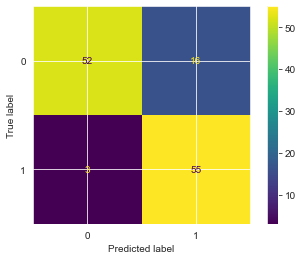

							-----------------------------------------------------------
							 Time for detection (LogisitcRegression) : 0.355 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For MultinomialNB The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.8888888888888888
--------------------------------------------------
F1 :  [0.89552239 0.88135593]
--------------------------------------------------
Reacll :  [0.88235294 0.89655172]
--------------------------------------------------
Precision :  [0.90909091 0.86666667]
--------------------------------------------------
Confusion Matrix....
 [[60  8]
 [ 6 52]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.91    

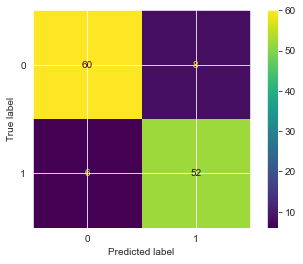

							-----------------------------------------------------------
							 Time for detection (MultinomialNB) : 0.192 seconds...
							-----------------------------------------------------------



In [30]:
# check the performance on diffrent regressor
models = []
models.append(('LogisitcRegression', LogisticRegression()))
models.append(('MultinomialNB', MultinomialNB()))
# models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))


# metrices to store performance
acc = []
pre = []
f1 = []
con = []
rec = []


import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # predict values
    y_pred = clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    # Precision
    precision = precision_score(y_test, y_pred, average=None)
    pre.append(precision)
    # Recall
    recall = recall_score(y_test, y_pred, average=None)
    rec.append(recall)
    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average=None)
    f1.append(f1_sco)
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    con.append(confusion_mat)
    # Report
    report = classification_report(y_test, y_pred)


    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Accuracy : ', accuracy)   
    print("-"*50)
    print('F1 : ', f1_sco)
    print("-"*50)
    print('Reacll : ', recall)
    print("-"*50)
    print('Precision : ', precision)
    print("-"*50)
    print('Confusion Matrix....\n', confusion_mat)
    print("-"*50)
    print('Classification Report....\n', report)
    print("-"*50)
    print('Plotting Confusion Matrix...\n')
    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()

In [31]:
comp = pd.DataFrame({"Model": dict(models).keys(), "Accuracy": acc, "Precision": pre, "Recall": rec, "F1_Score": f1, "Confusion Matrix": con})
comp

,Model,Accuracy,Precision,Recall,F1_Score,Confusion Matrix
0,LogisitcRegression,0.849206,"[0.9454545454545454, 0.7746478873239436]","[0.7647058823529411, 0.9482758620689655]","[0.8455284552845528, 0.8527131782945736]","[[52, 16], [3, 55]]"
1,MultinomialNB,0.888889,"[0.9090909090909091, 0.8666666666666667]","[0.8823529411764706, 0.896551724137931]","[0.8955223880597014, 0.8813559322033899]","[[60, 8], [6, 52]]"


# Building Final Model

In [32]:
NB_MN = MultinomialNB()
NB_MN.fit(X_train, y_train)
pred=NB_MN.predict(X_test)

Accuracy :  0.8888888888888888
--------------------------------------------------
F1 :  [0.89552239 0.88135593]
--------------------------------------------------
Reacll :  [0.88235294 0.89655172]
--------------------------------------------------
Precision :  [0.90909091 0.86666667]
--------------------------------------------------
Confusion Matrix....
 [[60  8]
 [ 6 52]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.91      0.88      0.90        68
           1       0.87      0.90      0.88        58

    accuracy                           0.89       126
   macro avg       0.89      0.89      0.89       126
weighted avg       0.89      0.89      0.89       126

--------------------------------------------------
Plotting Confusion Matrix...



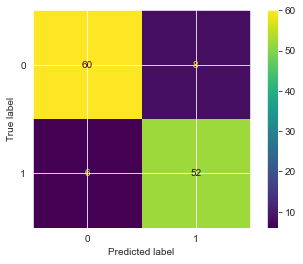

In [33]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
acc.append(accuracy)
# Precision
precision = precision_score(y_test, y_pred, average=None)
pre.append(precision)
# Recall
recall = recall_score(y_test, y_pred, average=None)
rec.append(recall)
# F1 Score
f1_sco = f1_score(y_test, y_pred, average=None)
f1.append(f1_sco)
# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
con.append(confusion_mat)
# Report
report = classification_report(y_test, y_pred)

print('Accuracy : ', accuracy)   
print("-"*50)
print('F1 : ', f1_sco)
print("-"*50)
print('Reacll : ', recall)
print("-"*50)
print('Precision : ', precision)
print("-"*50)
print('Confusion Matrix....\n', confusion_mat)
print("-"*50)
print('Classification Report....\n', report)
print("-"*50)
print('Plotting Confusion Matrix...\n')
plot_confusion_matrix(NB_MN, X_test, y_test)
plt.show()

In [34]:
# save the model to disk
filename = 'finalized_model.sav'
pkl.dump(NB_MN, open(filename, 'wb'))